VIRGINIA COVID-19 STATS data from https://www.vdh.virginia.gov/coronavirus/ daily                                                                                                       
- Cases reported, hospitalizations, and deaths are reported by 10 am ET, based on what was verified at 5 pm the day prior
- Tests and positive results are based on 'lab report date.'
- Northern Virginia (NoVa) combined cases from https://www.novaregiondashboard.com/cases-dashboard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
dates = ['3/07', '3/08', '3/09', '3/10', 
         '3/11', '3/12', '3/13', '3/14', '3/15', '3/16', '3/17', '3/18', '3/19', '3/20', 
         '3/21', '3/22', '3/23', '3/24', '3/25', '3/26', '3/27', '3/28', '3/29', '3/30', '3/31', 
         '4/01', '4/02', '4/03', '4/04', '4/05', '4/06', '4/07', '4/08', '4/09', '4/10',
         '4/11', '4/12', '4/13', '4/14', '4/15', '4/16', '4/17', '4/18', '4/19', '4/20', 
         '4/21', '4/22', '4/23', '4/24', '4/25', '4/26', '4/27', '4/28', '4/29', '4/30',
         '5/01', '5/02', '5/03', '5/04', '5/05', '5/06', '5/07', '5/08', '5/09', '5/10',
         '5/11', '5/12', '5/13', '5/14', '5/15', '5/16', '5/17', '5/18', '5/19', '5/20',
         '5/21', '5/22', '5/23', '5/24', '5/25', '5/26', '5/27', '5/28', '5/29', '5/30',]

In [3]:
new_reports_per_day = [1, 1, 3, 3, 1, 8, 13, 11, 4, 6, 15, 10, 16, 22, 39, 69, 32, 36, 101, 69, 144, 135, 151, 130, 230, 234, 222, 306, 395, 230, 241, 455, 312, 397, 467, 568, 
                       197, 473, 424, 329, 389, 602, 562, 484, 453, 640, 636, 732, 596, 772, 604, 565, 804, 622, 885, 1055, 830, 940, 821, 764, 657, 657, 772, 854, 885, 989, 730,
                       946, 1067, 859, 1011, 705, 752, 1005, 763, 1229, 813, 799, 495, 1483, 1615, 907, 1152, 1132, 1078]

In [4]:
new_hosp_per_day = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 19, 6, 7, 6, 7, 14, 6, 18, 16, 13, 24, 29, 43, 38, 
                    66, 78, 41, 66, 66, 52, 70, 87, 65, 35, 31, 75, 70, 66, 107, 75, 126, 78, 81, 78, 94, 84, 105, 72, 52, 99, 94, 63, 94, 103, 108, 73, 73, 91, 91, 104, 105, 47, 89,
                    95, 125, 72, 83, 49, 33, 65, 82, 75, 114, 52, 36, 33, 55, 56, 60, 57, 87, 72]

In [5]:
new_tests_per_day = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 307, 178, 336, 541, 561, 865, 468, 669, 970, 1004, 1241, 1756, 1555, 1207, 1533, 1699, 
                     2184, 1808, 2419, 2240, 3679, 2767, 2209, 2295, 2804, 2589, 2128, 2115, 1232, 1606, 2635, 2976, 2844, 2591, 2434, 1571, 2481, 4637, 5060, 3418, 4088, 3602, 2873, 
                     3797, 6407, 4939, 6162, 5554, 4569, 2795, 5517, 8082, 6624, 6034, 6577, 5308, 3613, 5019, 7840, 7209, 6324, 7203, 8362, 5018, 7209, 10071, 7252, 10254, 6842, 7543,
                     4951, 10528, 10626, 10829, 3391, np.nan]

In [6]:
pos_results_lab_date = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 11, 18, 16, 73, 49, 62, 23, 69, 103, 116, 156, 208, 179, 192, 219, 307, 341, 318, 333, 
                        420, 478, 396, 381, 441, 523, 421, 443, 412, 349, 371, 538, 626, 549, 530, 559, 435, 535, 869, 908, 748, 755, 818, 574, 746, 1187, 850, 1115, 901, 920, 516,
                        1059, 1255, 1109, 1022, 1040, 781, 558, 802, 1233, 1094, 933, 982, 1193, 669, 1083, 1489, 1167, 1439, 819, 878, 506, 1260, 1132, 1266, 338, np.nan]

In [7]:
new_deaths_per_day = [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 4, 0, 2, 0, 5, 3, 5, 3, 2, 7, 7, 5, 5, 0, 3, 9, 12, 34, 12, 9, 11, 8, 5, 41, 13, 23, 27, 19, 23, 24, 25, 
                      23, 38, 26, 12, 10, 34, 30, 30, 29, 35, 44, 24, 29, 28, 28, 43, 15, 12, 11, 41, 36, 28, 22, 25, 7, 5, 27, 33, 25, 37, 23, 12, 37, 28, 45, 57, 20, 12]

In [8]:
FX_new_cases = [1, 1, 0, 0, 0, 2, 2, 4, 0, 0, 2, 2, 1, 1, 6, 9, 12, 3, 31, 3, 45, 32, 31, 37, 20, 43, 40, 44, 15, 39, 62, 44, 38, 120, 87, 169, 62, 156, 43, 91, 77, 101, 
                157, 176, 116, 152, 179, 106, 172, 211, 144, 113, 276, 170, 163, 286, 149, 294, 275, 219, 105, 106, 293, 272, 282, 308, 270, 196, 285, 208, 227, 257, 200, 177, 143,
                417, 154, 211, 44, 493, 357, 230, 434, 235, 168]

In [9]:
NoVa_cases = [1, 1, 0, 0, 0, 2, 2, 4, 0, 0, 2, 27, 14, 4, 20, 18, 21, 15, 55, 29, 80, 70, 71, 49, 84, 91, 80, 99, 91, 109, 147, 178, 129, 213, 205, 303, 103, 284, 168, 173, 199, 265, 
              320, 337, 286, 337, 307, 308, 372, 409, 304, 328, 500, 409, 430, 608, 447, 609, 514, 430, 387, 255, 515, 491, 620, 719, 412, 528, 670, 421, 566, 448, 460, 533, 412, 818,
              481, 415, 216, 1069, 981, 509, 685, 604, 503]

In [10]:
Virginia_COVID_19 = pd.DataFrame(list(zip(dates, new_reports_per_day, new_hosp_per_day, new_tests_per_day, pos_results_lab_date, new_deaths_per_day, FX_new_cases)))

In [11]:
Virginia_COVID_19.columns = ['dates', 'new_reports_per_day', 'new_hosp_per_day', 'new_tests_per_day', 'pos_results_lab_date', 'new_deaths_per_day', 'FX_new_cases']

In [12]:
Virginia_COVID_19['double_rate_cases'] = 70 / (Virginia_COVID_19['new_reports_per_day'].cumsum().pct_change() * 100)

In [13]:
Virginia_COVID_19['double_rate_hosp'] = 70 / (Virginia_COVID_19['new_hosp_per_day'].cumsum().pct_change() * 100)

In [14]:
Virginia_COVID_19['double_rate_test'] = 70 / (Virginia_COVID_19['new_tests_per_day'].cumsum().pct_change() * 100)

In [15]:
Virginia_COVID_19['double_rate_pos_lab'] = 70 / (Virginia_COVID_19['pos_results_lab_date'].cumsum().pct_change() * 100)

In [16]:
Virginia_COVID_19['double_rate_deaths'] = 70 / (Virginia_COVID_19['new_deaths_per_day'].cumsum().pct_change() * 100)

In [17]:
Virginia_COVID_19['double_rate_FX'] = 70 / (Virginia_COVID_19['FX_new_cases'].cumsum().pct_change() * 100)

In [18]:
Virginia_COVID_19['new_reports_rolling_7'] = Virginia_COVID_19['new_reports_per_day'].rolling(window=7).mean()

In [19]:
Virginia_COVID_19['hosp_rolling_7'] = Virginia_COVID_19['new_hosp_per_day'].rolling(window=7).mean()

In [20]:
Virginia_COVID_19['new_tests_rolling_7'] = Virginia_COVID_19['new_tests_per_day'].rolling(window=7).mean()

In [21]:
Virginia_COVID_19['pos_lab_rolling_7'] = Virginia_COVID_19['pos_results_lab_date'].rolling(window=7).mean()

In [22]:
Virginia_COVID_19['deaths_rolling_7'] = Virginia_COVID_19['new_deaths_per_day'].rolling(window=7).mean()

In [23]:
Virginia_COVID_19['FX_rolling_7'] = Virginia_COVID_19['FX_new_cases'].rolling(window=7).mean()

In [24]:
Virginia_COVID_19['sans_FX'] = Virginia_COVID_19['new_reports_per_day'] - Virginia_COVID_19['FX_new_cases']

In [25]:
Virginia_COVID_19['sans_FX_rolling_7'] = Virginia_COVID_19['sans_FX'].rolling(window=7).mean()

In [26]:
Virginia_COVID_19['sans_NoVa'] = Virginia_COVID_19['new_reports_per_day'] - NoVa_cases

In [27]:
Virginia_COVID_19['sans_NoVa_rolling_7'] = Virginia_COVID_19['sans_NoVa'].rolling(window=7).mean()

In [28]:
Virginia_COVID_19.set_index('dates')

,new_reports_per_day,new_hosp_per_day,new_tests_per_day,pos_results_lab_date,new_deaths_per_day,FX_new_cases,double_rate_cases,double_rate_hosp,double_rate_test,double_rate_pos_lab,...,new_reports_rolling_7,hosp_rolling_7,new_tests_rolling_7,pos_lab_rolling_7,deaths_rolling_7,FX_rolling_7,sans_FX,sans_FX_rolling_7,sans_NoVa,sans_NoVa_rolling_7
dates,,,,,,,,,,,,,,,,,,,,,
3/07,1,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN
3/08,1,NaN,NaN,NaN,0,1,0.700000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN
3/09,3,NaN,NaN,NaN,0,0,0.466667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,3,NaN
3/10,3,NaN,NaN,NaN,0,0,1.166667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,3,NaN
3/11,1,NaN,NaN,NaN,0,0,5.600000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/26,1615,56.0,10528.0,1260.0,28,357,16.352260,53.362500,17.636303,24.010000,...,1028.142857,60.142857,8205.857143,1079.714286,27.857143,259.857143,1258,768.285714,634,400.714286
5/27,907,60.0,10626.0,1132.0,45,230,30.363175,50.458333,18.167194,27.504064,...,1048.714286,58.000000,8285.142857,1028.714286,29.571429,272.285714,677,776.428571,398,407.428571
5/28,1152,57.0,10829.0,1266.0,57,434,24.456858,53.850877,18.513510,25.218799,...,1037.714286,49.857143,8796.142857,1042.857143,34.142857,274.714286,718,763.000000,467,415.428571


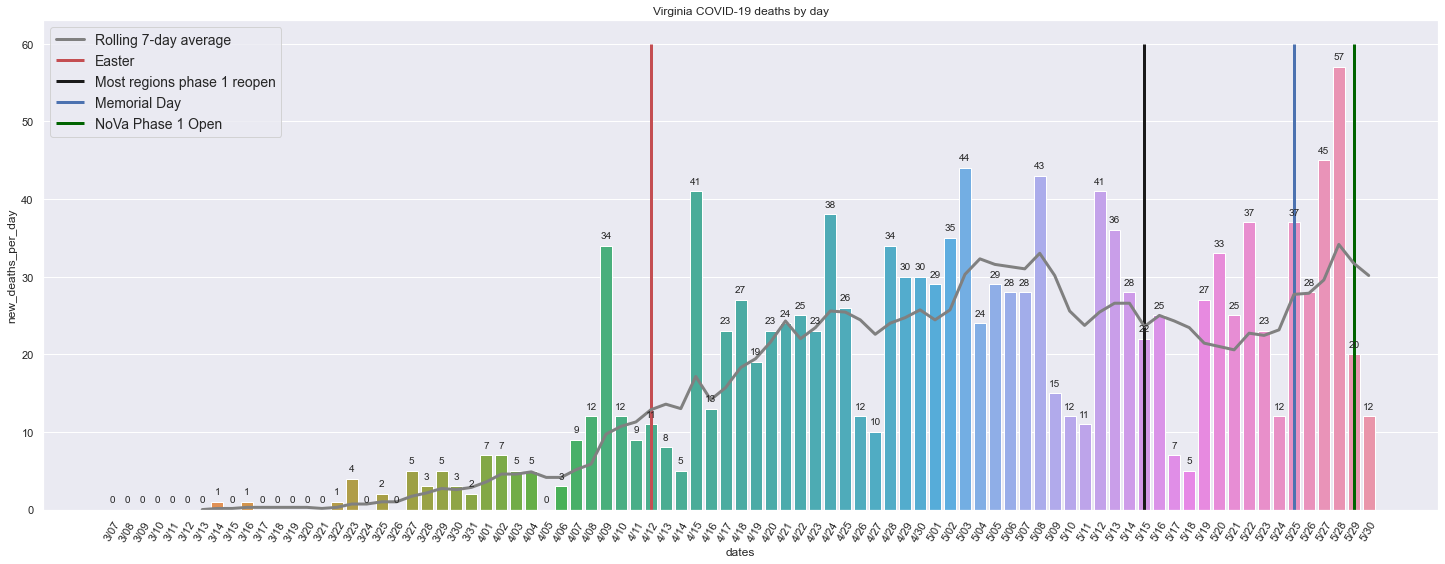

In [29]:
plt.figure(figsize=(25, 9))
death_daily = sns.barplot(x='dates', y='new_deaths_per_day', data=Virginia_COVID_19)
for p in death_daily.patches:
    death_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.plot(Virginia_COVID_19['deaths_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=36, ymin=0, ymax=60, color='r', label='Easter', linewidth=3)
plt.vlines(x=69, ymin=0, ymax=60, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=79, ymin=0, ymax=60, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=83, ymin=0, ymax=60, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.title('Virginia COVID-19 deaths by day')
plt.show()

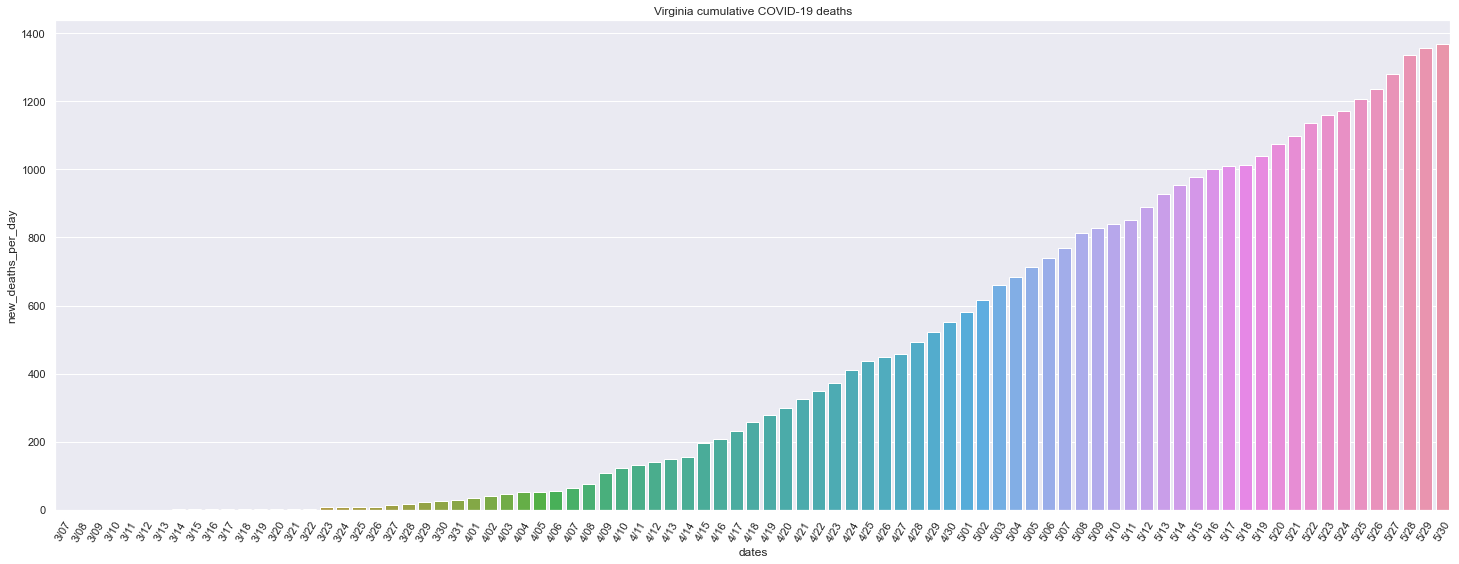

In [30]:
plt.figure(figsize=(25, 9))
death_cum = sns.barplot(x='dates', y=Virginia_COVID_19.new_deaths_per_day.cumsum(), data=Virginia_COVID_19)
#for p in death_cum.patches:
    #death_cum.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points', rotation=45)
plt.xticks(rotation=60)
plt.title('Virginia cumulative COVID-19 deaths')
#plt.savefig('Viginia cumulative COVID-19 deaths as of March 29')
plt.show()

In [31]:
print(Virginia_COVID_19.new_deaths_per_day.sum())

1370


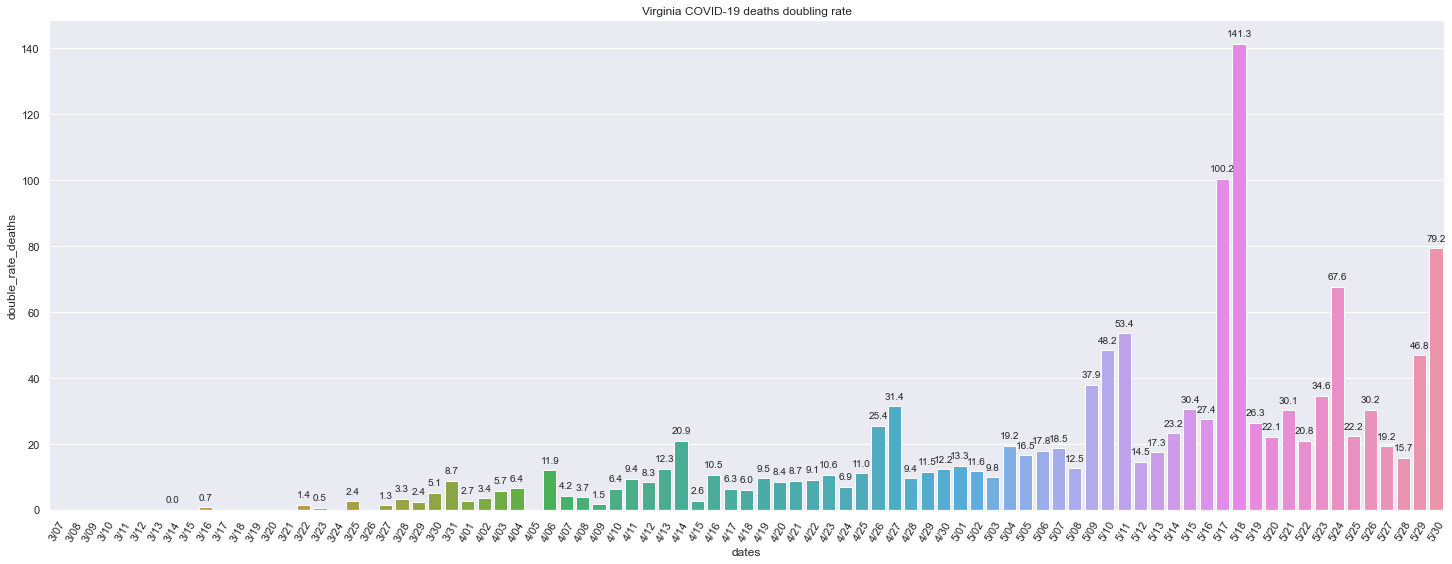

In [32]:
plt.figure(figsize=(25, 9))
VA_deaths_double_rate = sns.barplot(x='dates', y='double_rate_deaths', data=Virginia_COVID_19)
for p in VA_deaths_double_rate.patches:
    VA_deaths_double_rate.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), 
                                   textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Virginia COVID-19 deaths doubling rate')
plt.show()

In [33]:
print(Virginia_COVID_19['double_rate_deaths'][-7:].mean())

40.138185666869845


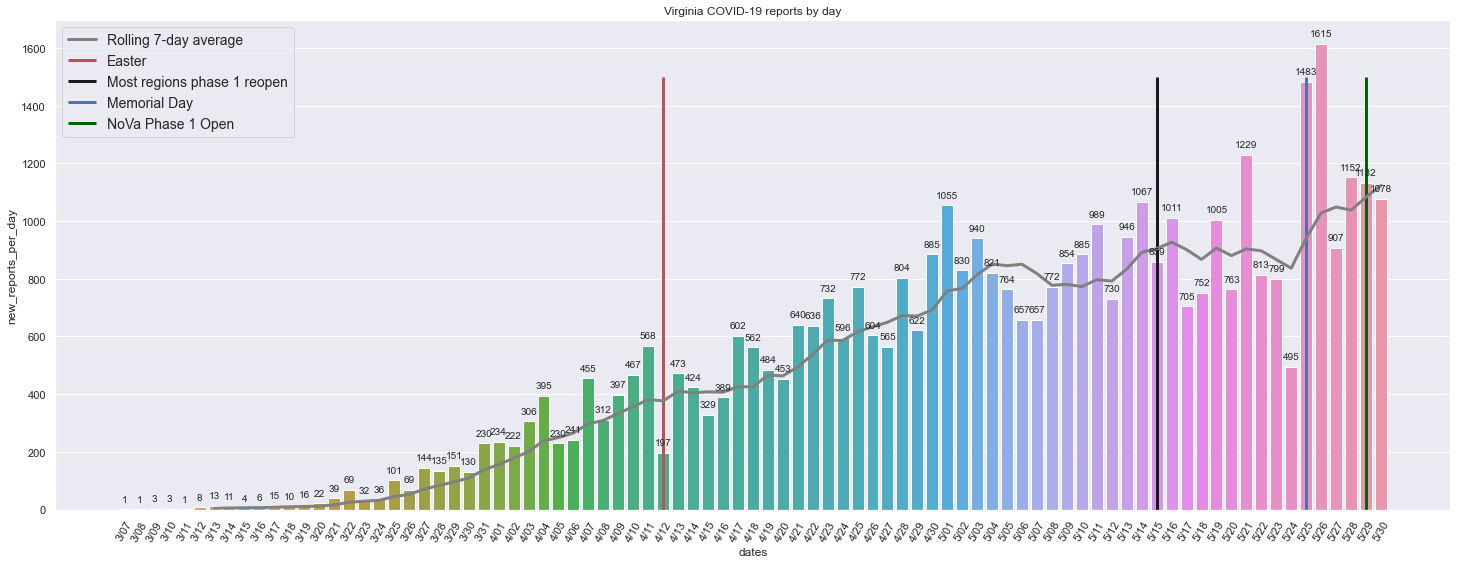

In [34]:
plt.figure(figsize=(25, 9))
reports_daily = sns.barplot(x='dates', y='new_reports_per_day', data=Virginia_COVID_19)
for p in reports_daily.patches:
    reports_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.vlines(x=36, ymin=0, ymax=1500, color='r', label='Easter', linewidth=3)
plt.vlines(x=69, ymin=0, ymax=1500, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=79, ymin=0, ymax=1500, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=83, ymin=0, ymax=1500, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.plot(Virginia_COVID_19['new_reports_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.savefig('Viginia daily COVID-19 reports')
plt.title('Virginia COVID-19 reports by day')
plt.show()

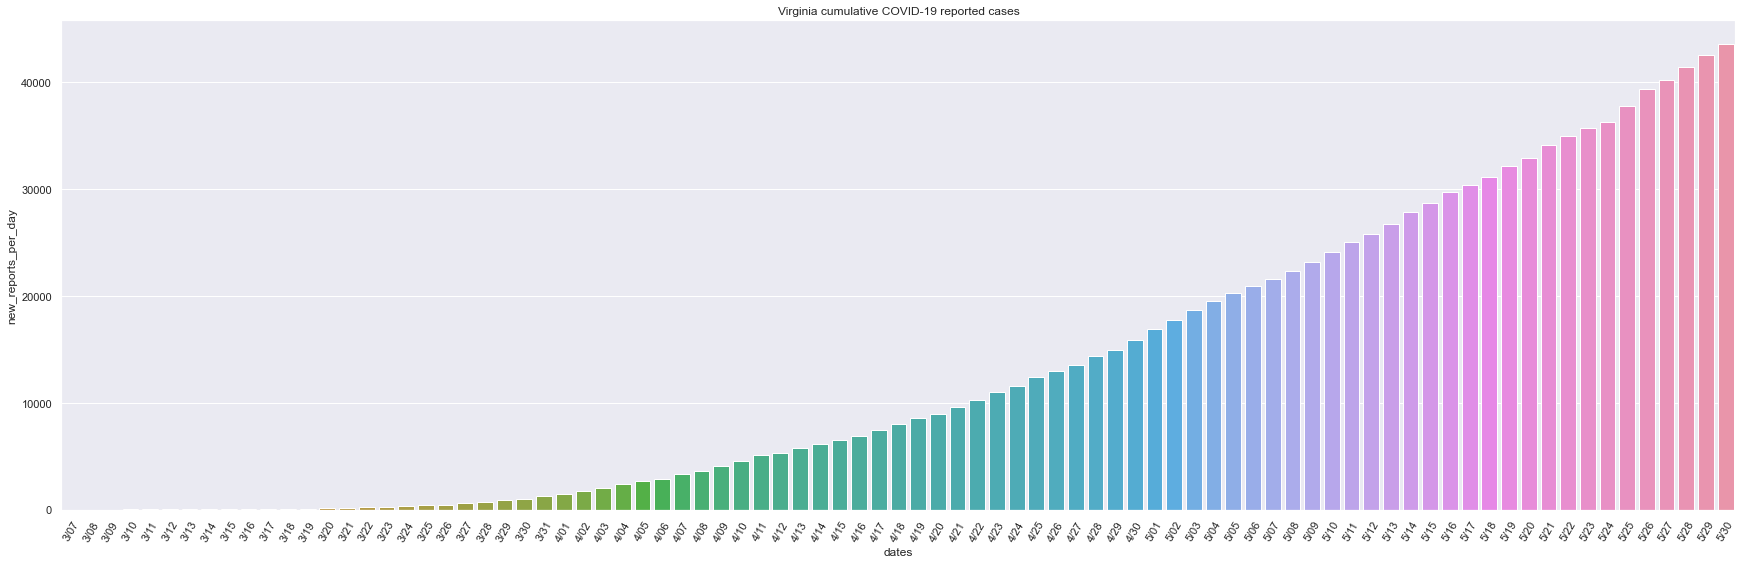

In [35]:
plt.figure(figsize=(30, 9))
cases_plot = sns.barplot(x='dates', y=Virginia_COVID_19.new_reports_per_day.cumsum(), data=Virginia_COVID_19)
#for p in cases_plot.patches:
    #cases_plot.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points', rotation=45)
plt.xticks(rotation=60)
plt.title('Virginia cumulative COVID-19 reported cases')
#plt.savefig('Viginia cumulative COVID-19 reports')
plt.show()

In [36]:
print(Virginia_COVID_19.new_reports_per_day.sum())

43611


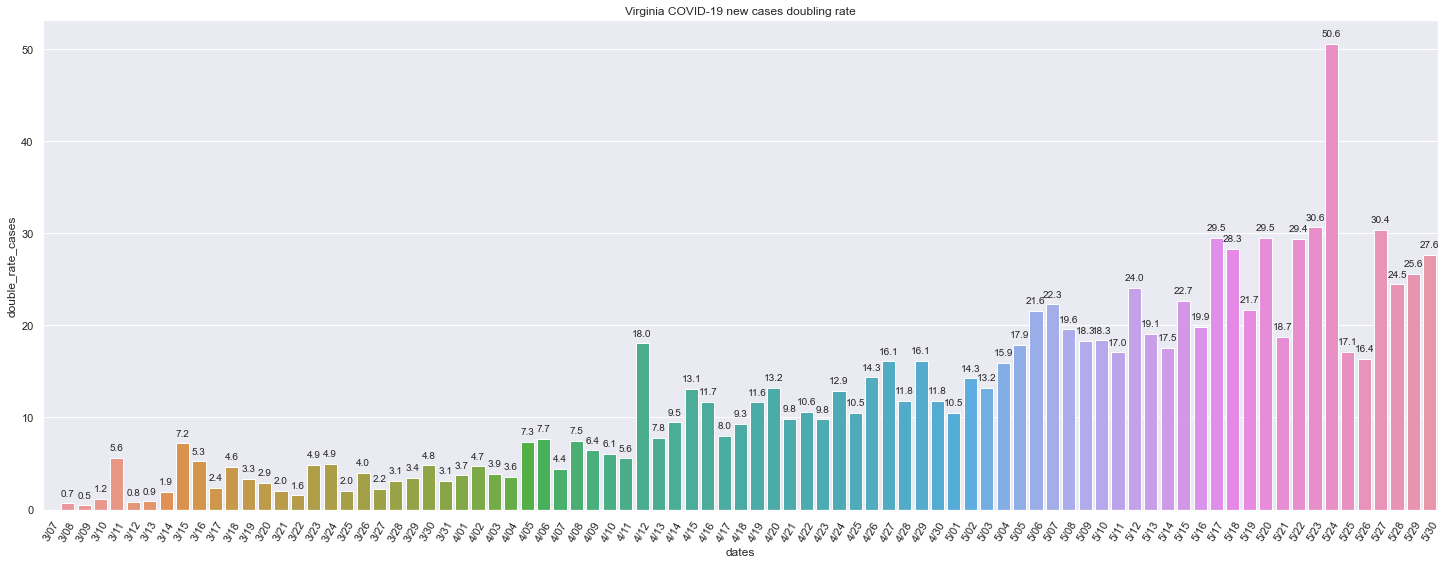

In [37]:
plt.figure(figsize=(25, 9))
VA_cases_double_rate = sns.barplot(x='dates', y='double_rate_cases', data=Virginia_COVID_19)
for p in VA_cases_double_rate.patches:
    VA_cases_double_rate.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), 
                                  textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Virginia COVID-19 new cases doubling rate')
plt.show()

In [38]:
print(Virginia_COVID_19['double_rate_cases'][-7:].mean())

27.436335032414572


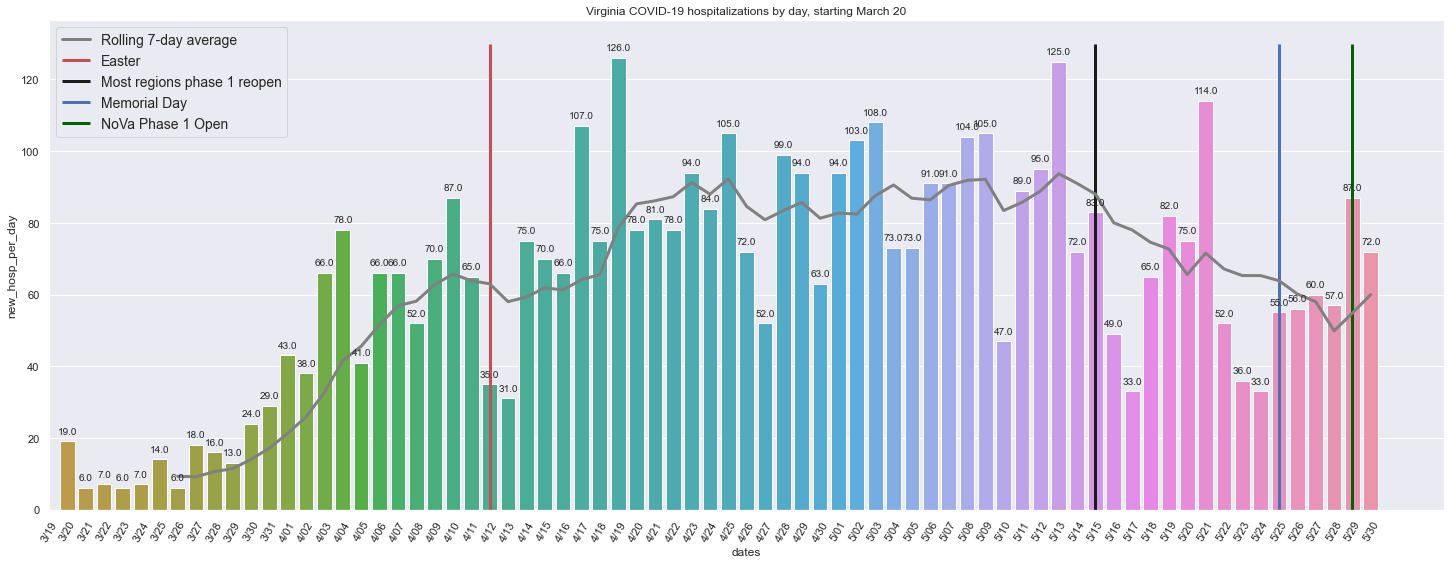

In [39]:
plt.figure(figsize=(25, 9))
hosp_daily = sns.barplot(x='dates', y='new_hosp_per_day', data=Virginia_COVID_19)
for p in hosp_daily.patches:
    hosp_daily.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.plot(Virginia_COVID_19['hosp_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=36, ymin=0, ymax=130, color='r', label='Easter', linewidth=3)
plt.vlines(x=69, ymin=0, ymax=130, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=79, ymin=0, ymax=130, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=83, ymin=0, ymax=130, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.xlim(12)
plt.legend(loc="upper left", fontsize=14)
plt.title('Virginia COVID-19 hospitalizations by day, starting March 20')
plt.show()

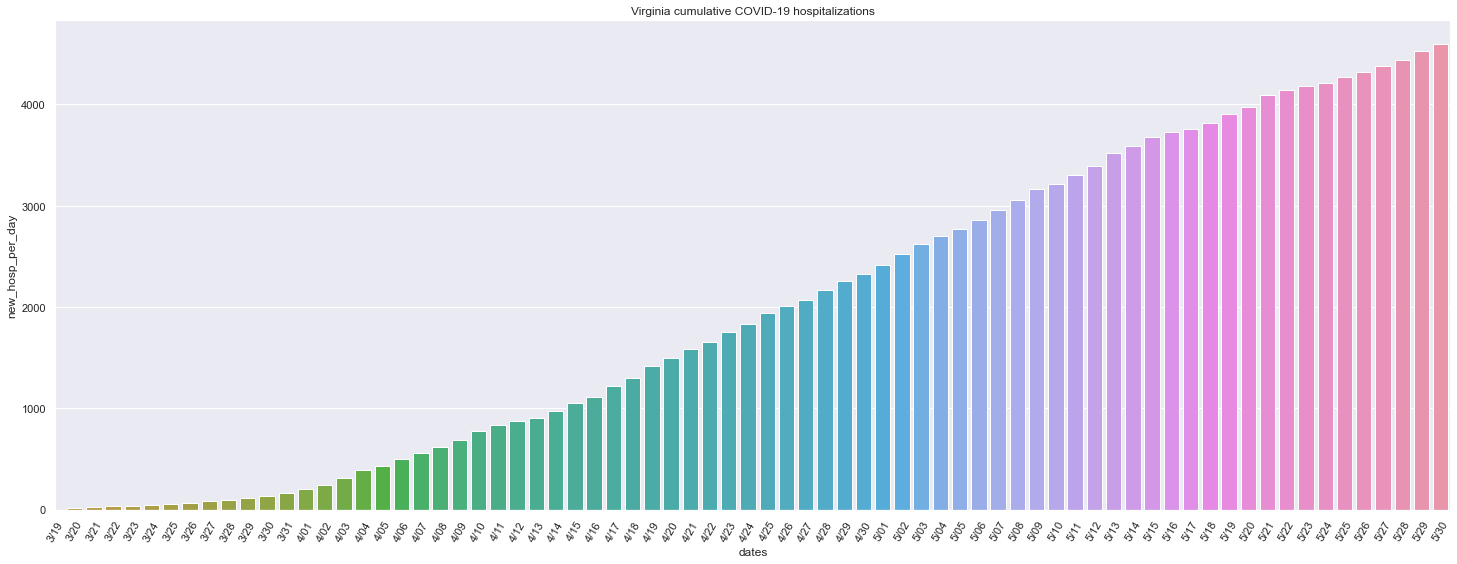

In [40]:
plt.figure(figsize=(25, 9))
hosp_cum = sns.barplot(x='dates', y=Virginia_COVID_19.new_hosp_per_day.cumsum(), data=Virginia_COVID_19)
#for p in hosp_cum.patches:
    #hosp_cum.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.title('Virginia cumulative COVID-19 hospitalizations')
#plt.savefig('Viginia cumulative COVID-19 reports as of March 30')
plt.show()

In [41]:
print(Virginia_COVID_19.new_hosp_per_day.sum())

4601.0


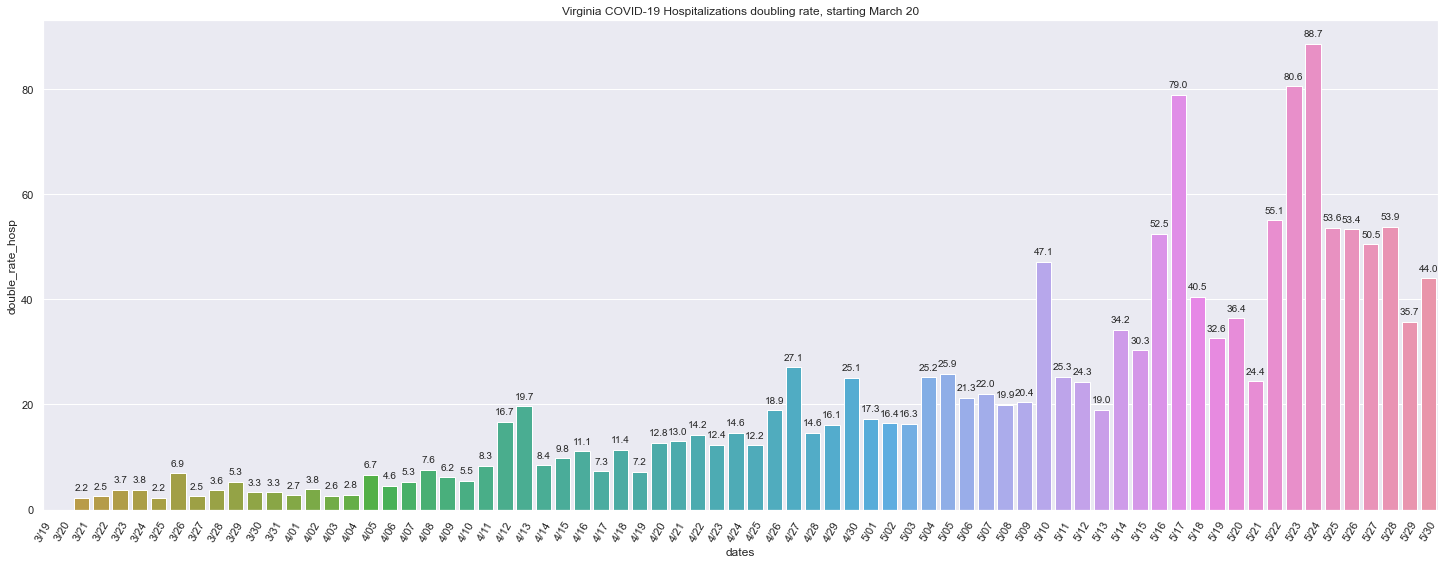

In [42]:
plt.figure(figsize=(25, 9))
hosp_double_rate = sns.barplot(x='dates', y='double_rate_hosp', data=Virginia_COVID_19)
for p in hosp_double_rate.patches:
    hosp_double_rate.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.title('Virginia COVID-19 Hospitalizations doubling rate, starting March 20')
plt.show()

In [43]:
print(Virginia_COVID_19['double_rate_hosp'][-7:].mean())

54.252070130917744


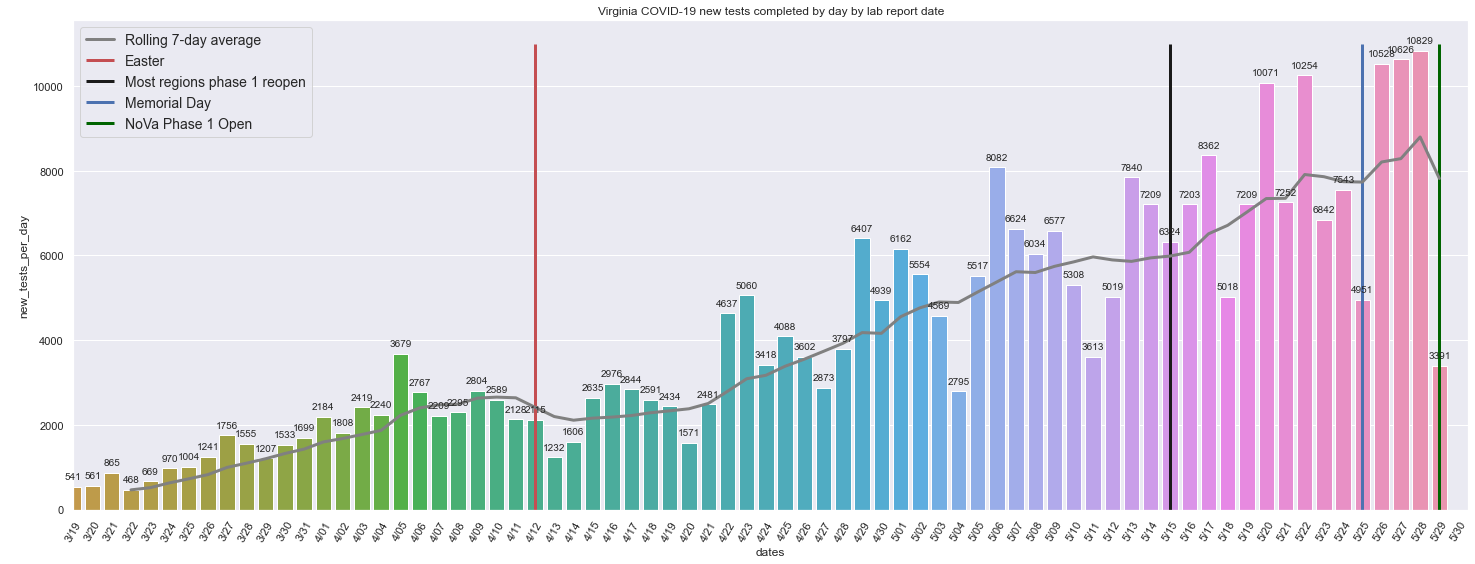

In [44]:
plt.figure(figsize=(25, 9))
tests_daily = sns.barplot(x='dates', y='new_tests_per_day', data=Virginia_COVID_19)
for p in tests_daily.patches:
    tests_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.plot(Virginia_COVID_19['new_tests_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=36, ymin=0, ymax=11000, color='r', label='Easter', linewidth=3)
plt.vlines(x=69, ymin=0, ymax=11000, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=79, ymin=0, ymax=11000, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=83, ymin=0, ymax=11000, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.title('Virginia COVID-19 new tests completed by day by lab report date')
plt.show()

In [45]:
from scipy.stats import linregress
print('Slope Tests 3/22-5/23: ', linregress([15, Virginia_COVID_19['new_tests_rolling_7'][15]], [77, Virginia_COVID_19['new_tests_rolling_7'][77]])[0])
print('Slope Tests 3/22-4/19: ', linregress([15, Virginia_COVID_19['new_tests_rolling_7'][15]], [45, Virginia_COVID_19['new_tests_rolling_7'][45]])[0])
print('Slope Tests 4/20-5/23: ', linregress([44, Virginia_COVID_19['new_tests_rolling_7'][44]], [77, Virginia_COVID_19['new_tests_rolling_7'][77]])[0])

Slope Tests 3/22-5/23:  17.28625833068867
Slope Tests 3/22-4/19:  5.463979688987623
Slope Tests 4/20-5/23:  3.3316410789650748


These numbers are updated daily, not just for the most recent day, but past dates as well, as not all tests administered on a given day are reported back to the VDH on the same day.

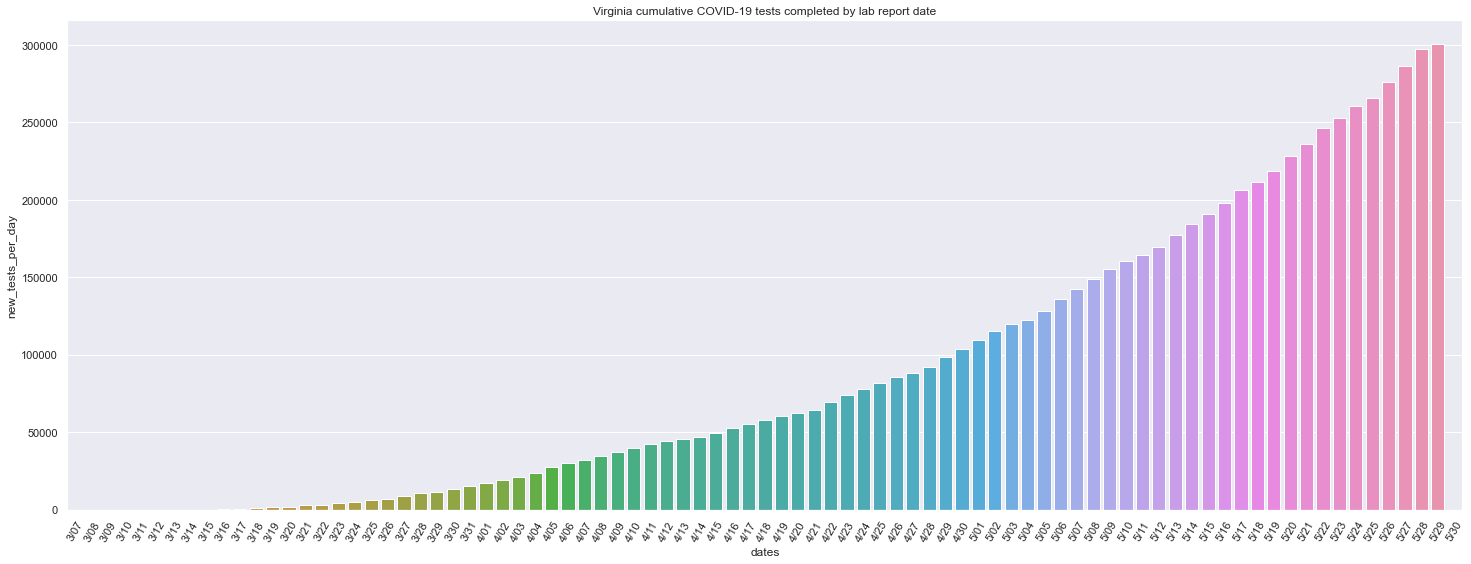

In [46]:
plt.figure(figsize=(25, 9))
tests_cum = sns.barplot(x='dates', y=Virginia_COVID_19.new_tests_per_day.cumsum(), data=Virginia_COVID_19)
#for p in tests_cum.patches:
    #tests_cum.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points', rotation=40)
plt.xticks(rotation=60)
#plt.xlim(12)
plt.title('Virginia cumulative COVID-19 tests completed by lab report date')
#plt.savefig('Viginia cumulative COVID-19 reports as of March 30')
plt.show()

In [47]:
print(Virginia_COVID_19.new_tests_per_day.sum())

300624.0


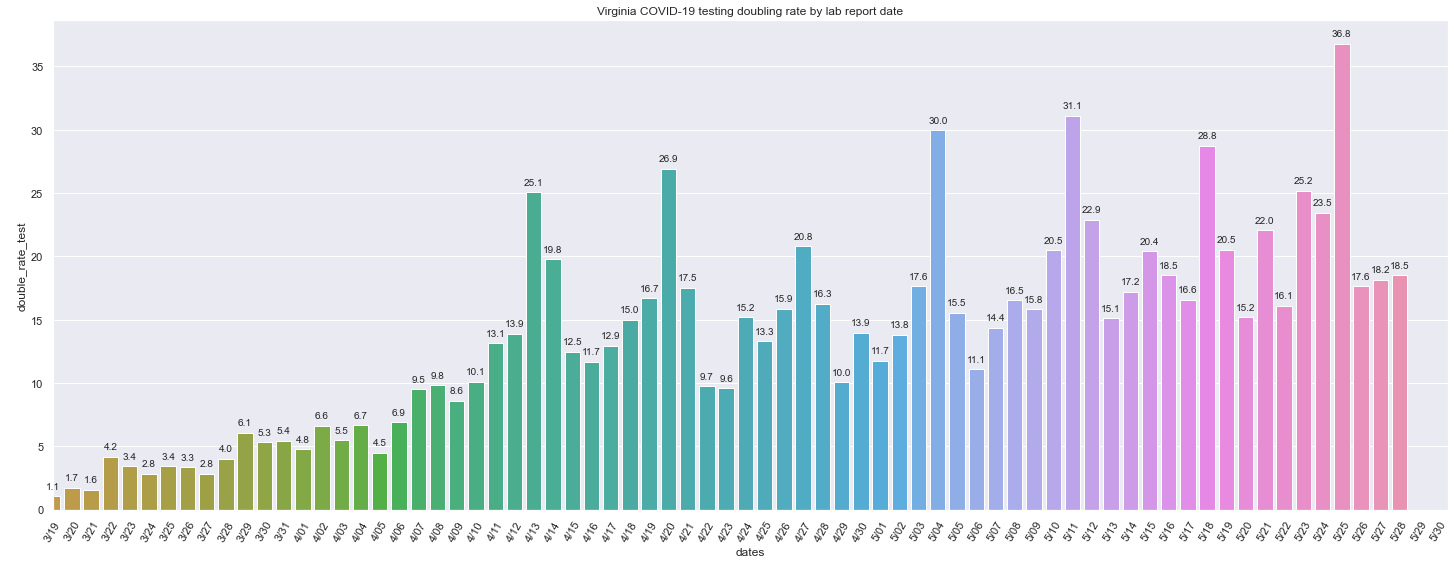

In [48]:
plt.figure(figsize=(25, 9))
tests_double_rate = sns.barplot(x='dates', y=Virginia_COVID_19['double_rate_test'][:-2], data=Virginia_COVID_19)
for p in tests_double_rate.patches:
    tests_double_rate.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), 
                               textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.title('Virginia COVID-19 testing doubling rate by lab report date')
plt.show()

In [49]:
print(Virginia_COVID_19['double_rate_test'][-10:-3].mean())

22.765151547513813


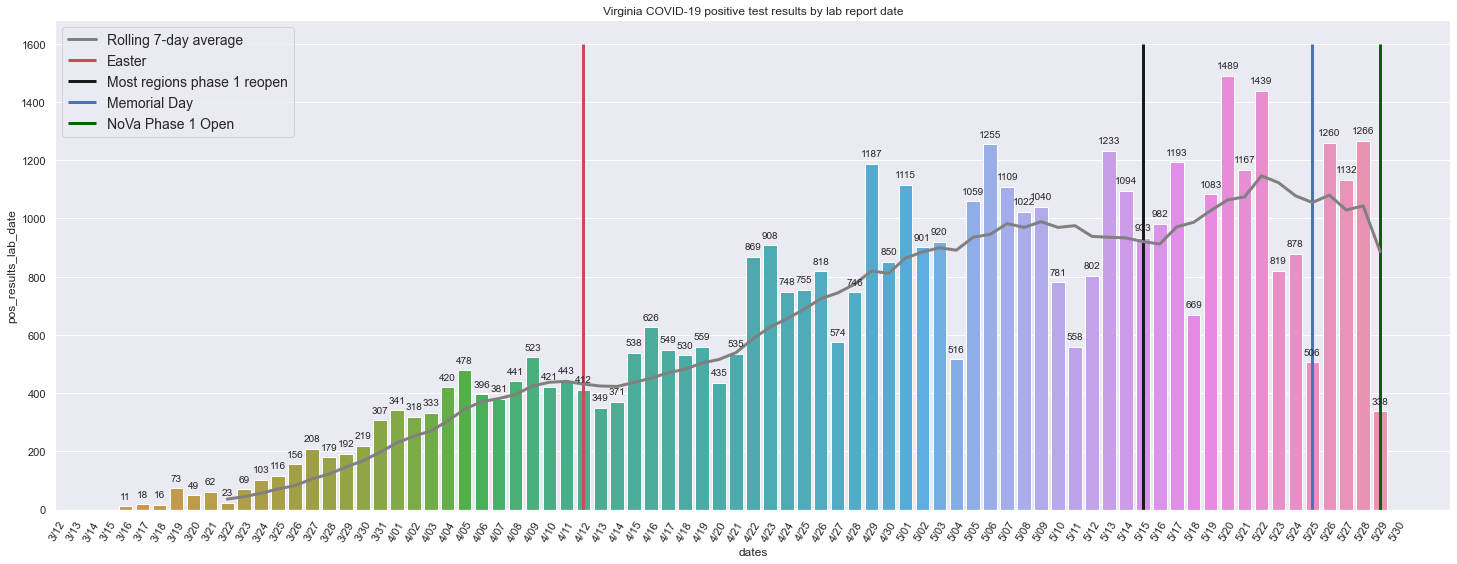

In [50]:
plt.figure(figsize=(25, 9))
pos_lab_daily = sns.barplot(x='dates', y='pos_results_lab_date', data=Virginia_COVID_19)
for p in pos_lab_daily.patches:
    pos_lab_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
#plt.xlim(12)
plt.plot(Virginia_COVID_19['pos_lab_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=36, ymin=0, ymax=1600, color='r', label='Easter', linewidth=3)
plt.vlines(x=69, ymin=0, ymax=1600, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=79, ymin=0, ymax=1600, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=83, ymin=0, ymax=1600, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.title('Virginia COVID-19 positive test results by lab report date')
plt.show()

In [51]:
print('Slope Positive tests 3/22-5/23: ', linregress([15, Virginia_COVID_19['pos_lab_rolling_7'][15]], [77, Virginia_COVID_19['pos_lab_rolling_7'][77]])[0])
print('Slope Positive tests 3/22-4/19: ', linregress([15, Virginia_COVID_19['pos_lab_rolling_7'][15]], [44, Virginia_COVID_19['pos_lab_rolling_7'][44]])[0])
print('Slope Positive tests 4/20-5/23: ', linregress([44, Virginia_COVID_19['pos_lab_rolling_7'][44]], [77, Virginia_COVID_19['pos_lab_rolling_7'][77]])[0])

Slope Positive tests 3/22-5/23:  49.795918367346935
Slope Positive tests 3/22-4/19:  22.448979591836736
Slope Positive tests 4/20-5/23:  2.2181818181818183


These numbers are updated daily, not just for the most recent day, but past dates as well, as not all tests administered on a given day are reported back to the VDH on the same day.

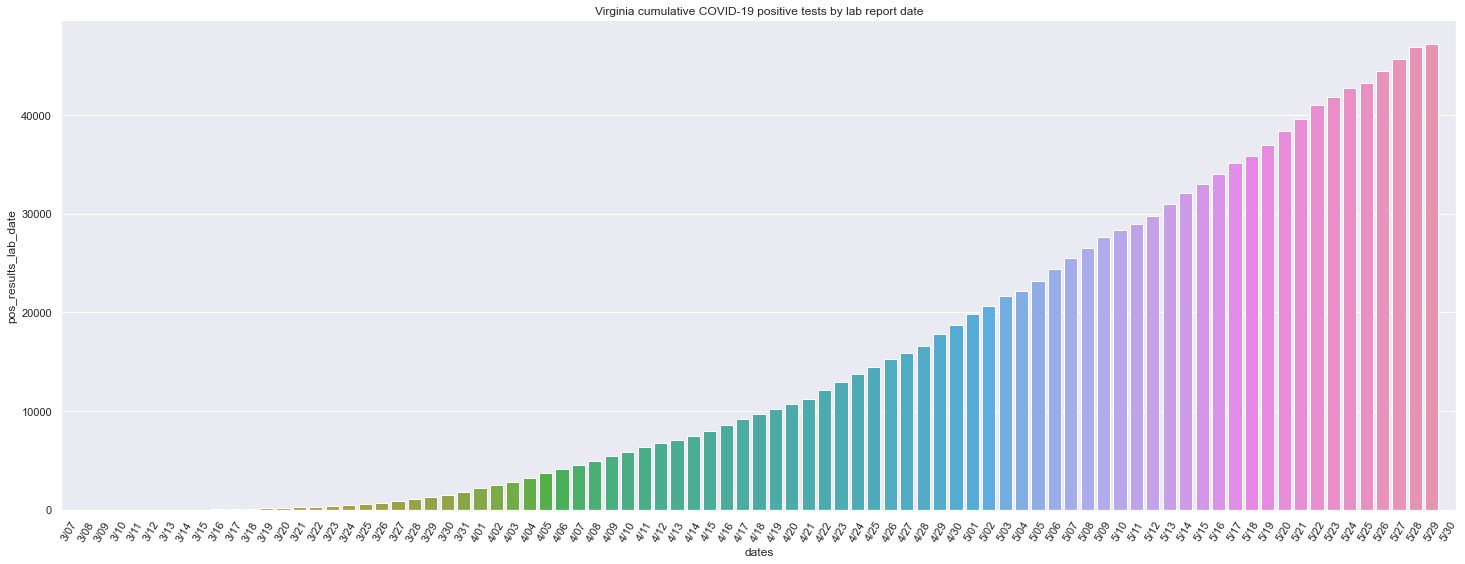

In [52]:
plt.figure(figsize=(25, 9))
pos_lab_cum = sns.barplot(x='dates', y=Virginia_COVID_19.pos_results_lab_date.cumsum(), data=Virginia_COVID_19)
#for p in tests_cum.patches:
    #tests_cum.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points', rotation=40)
plt.xticks(rotation=60)
#plt.xlim(12)
plt.title('Virginia cumulative COVID-19 positive tests by lab report date')
#plt.savefig('Viginia cumulative COVID-19 reports as of March 30')
plt.show()

In [53]:
print(Virginia_COVID_19.pos_results_lab_date.sum())

47214.0


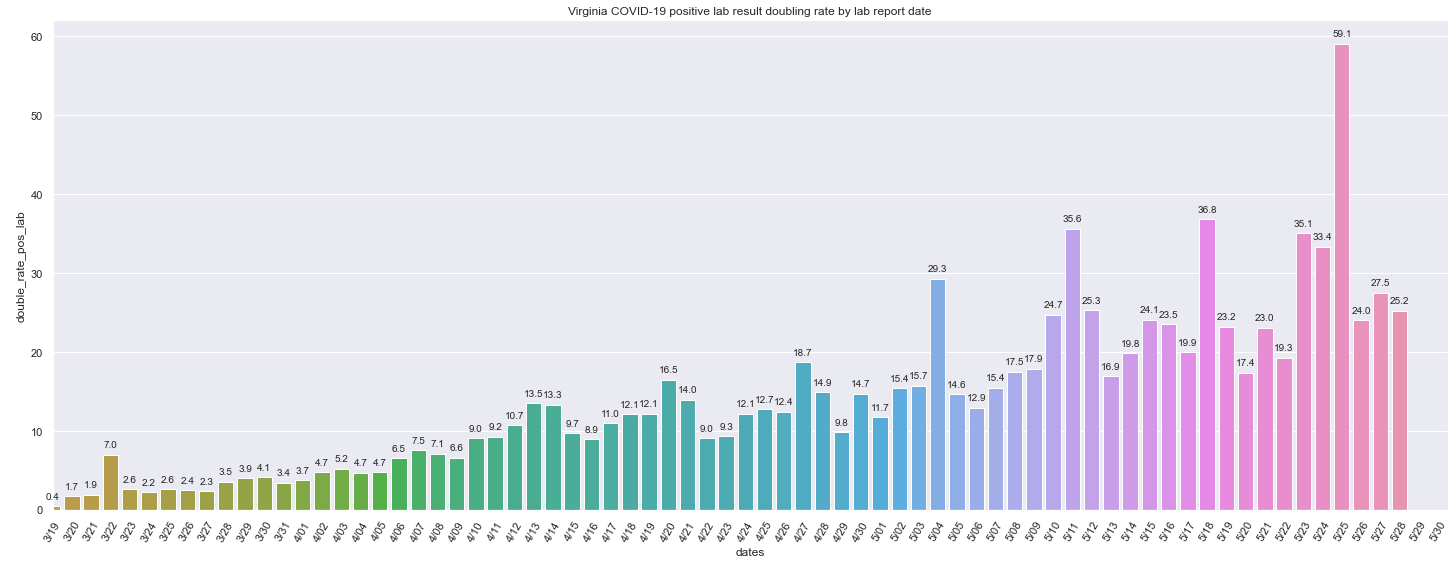

In [54]:
plt.figure(figsize=(25, 9))
pos_lab_double_rate = sns.barplot(x='dates', y=Virginia_COVID_19['double_rate_pos_lab'][:-2], data=Virginia_COVID_19)
for p in pos_lab_double_rate.patches:
    pos_lab_double_rate.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.title('Virginia COVID-19 positive lab result doubling rate by lab report date')
plt.show()

In [55]:
print(Virginia_COVID_19['double_rate_pos_lab'][-10:-3].mean())

31.614390518246918


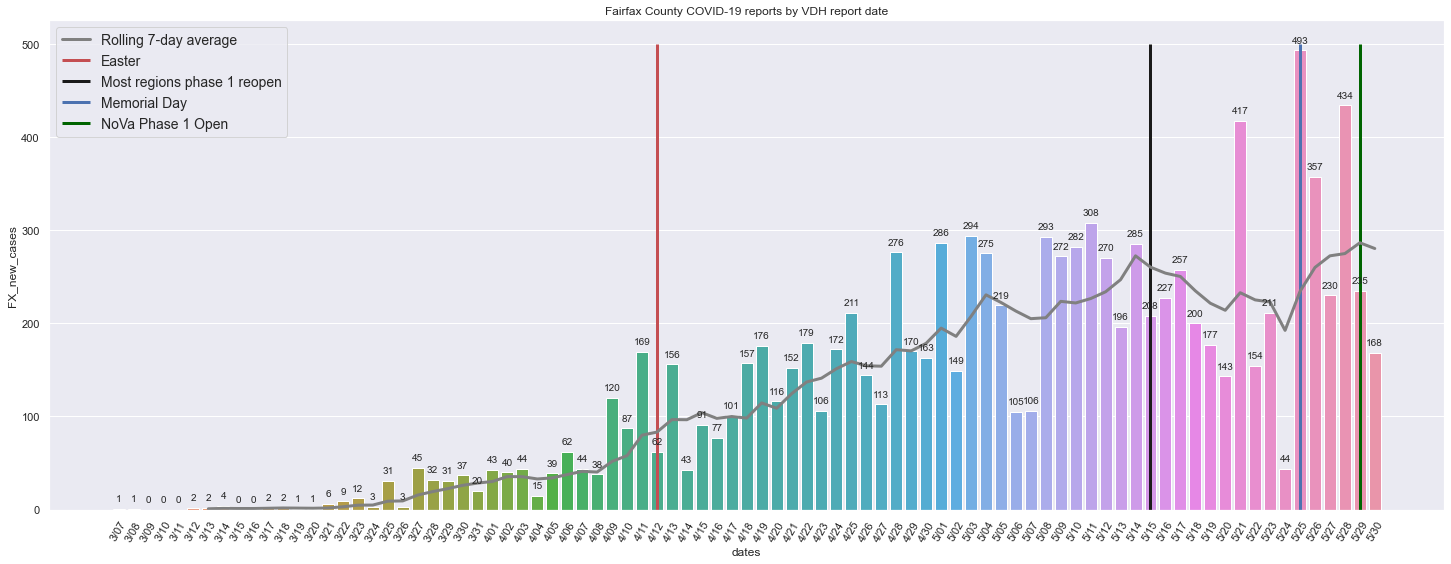

In [56]:
plt.figure(figsize=(25, 9))
FX_reports_daily = sns.barplot(x='dates', y='FX_new_cases', data=Virginia_COVID_19)
for p in FX_reports_daily.patches:
    FX_reports_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), 
                              textcoords='offset points')
plt.xticks(rotation=60)
plt.plot(Virginia_COVID_19['FX_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=36, ymin=0, ymax=500, color='r', label='Easter', linewidth=3)
plt.vlines(x=69, ymin=0, ymax=500, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=79, ymin=0, ymax=500, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=83, ymin=0, ymax=500, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.title('Fairfax County COVID-19 reports by VDH report date')
plt.legend(loc='best', fontsize=14)
plt.savefig('Fairfax County daily COVID-19 reports by VDH report date')
plt.show()

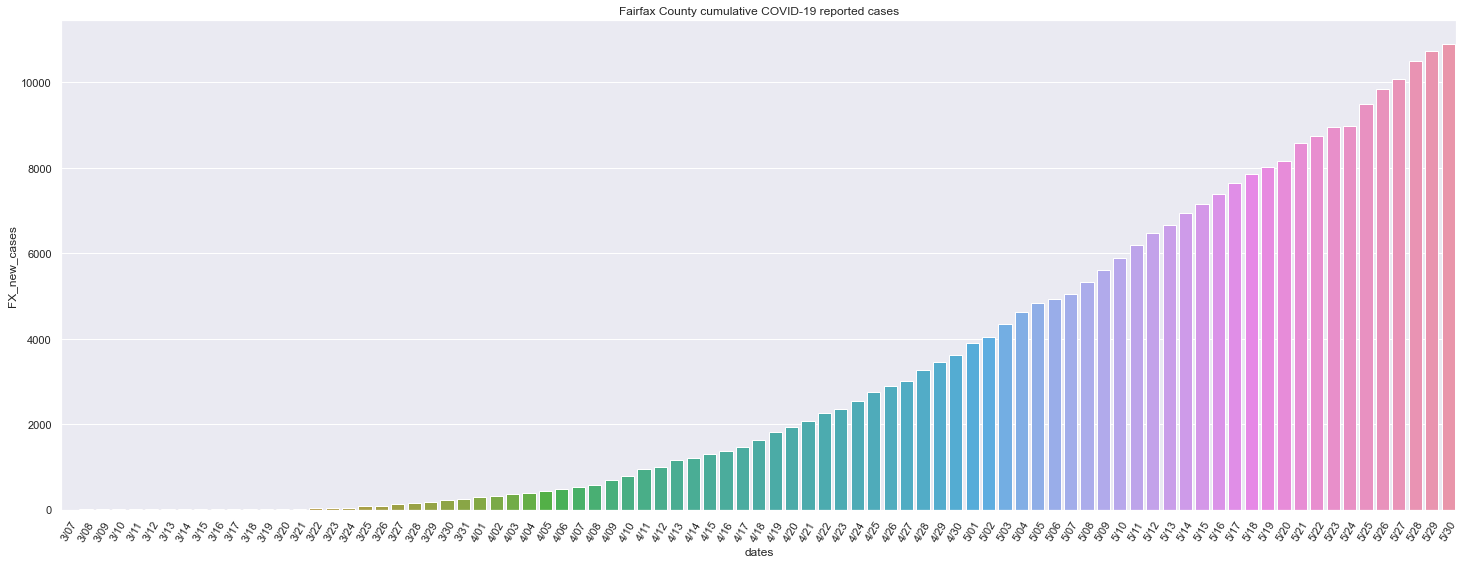

In [57]:
plt.figure(figsize=(25, 9))
FX_reports_cum = sns.barplot(x='dates', y=Virginia_COVID_19.FX_new_cases.cumsum(), data=Virginia_COVID_19)
#for p in FX_reports_cum.patches:
    #FX_reports_cum.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Fairfax County cumulative COVID-19 reported cases')
#plt.savefig('Viginia cumulative COVID-19 reports as of March 30')
plt.show()

In [58]:
print(Virginia_COVID_19.FX_new_cases.sum())

10906


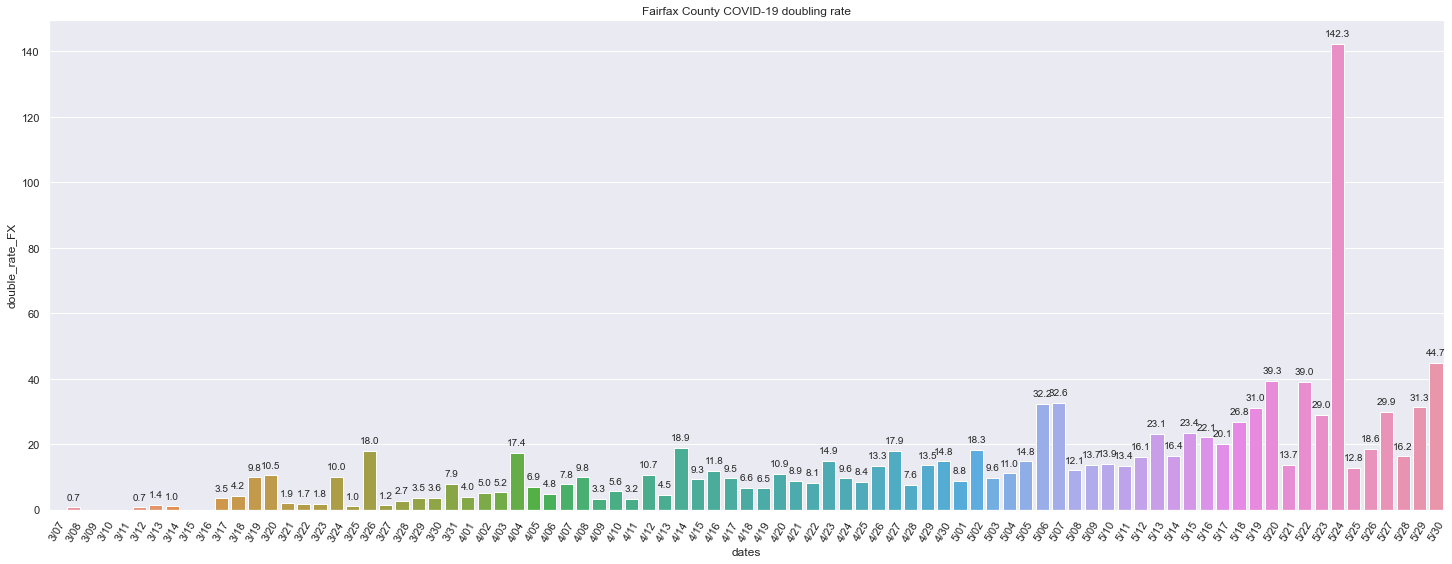

In [59]:
plt.figure(figsize=(25, 9))
FX_double_rate = sns.barplot(x='dates', y='double_rate_FX', data=Virginia_COVID_19)
for p in FX_double_rate.patches:
    FX_double_rate.annotate(format(p.get_height(), '.01f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Fairfax County COVID-19 doubling rate')
plt.show()

In [60]:
print(Virginia_COVID_19['double_rate_FX'][-7:].mean())

42.26779497421746


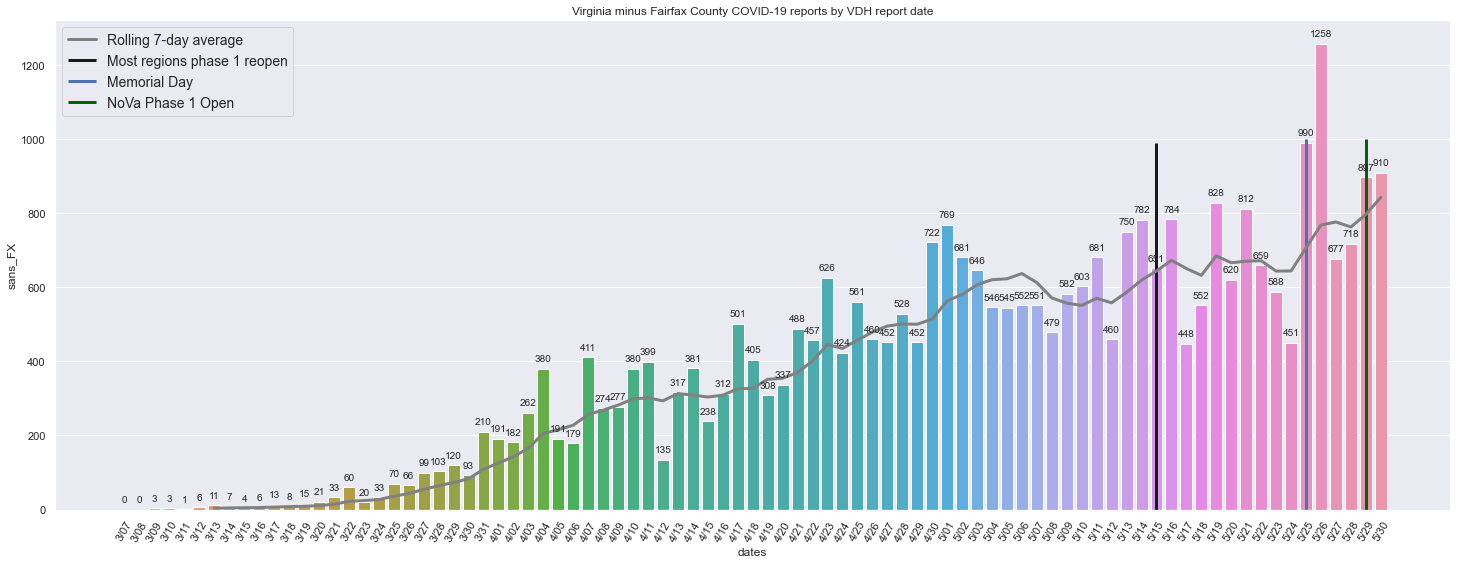

In [61]:
plt.figure(figsize=(25, 9))
VA_sans_FX_reports_daily = sns.barplot(x='dates', y='sans_FX', data=Virginia_COVID_19)
for p in VA_sans_FX_reports_daily.patches:
    VA_sans_FX_reports_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), 
                              textcoords='offset points')
plt.xticks(rotation=60)
plt.plot(Virginia_COVID_19['sans_FX_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=69, ymin=0, ymax=990, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=79, ymin=0, ymax=1000, color='b', label='Memorial Day', linewidth=3)
plt.vlines(x=83, ymin=0, ymax=1000, color='darkgreen', label='NoVa Phase 1 Open', linewidth=3)
plt.title('Virginia minus Fairfax County COVID-19 reports by VDH report date')
plt.legend(loc='best', fontsize=14)
#plt.savefig('Fairfax County daily COVID-19 reports')
plt.show()

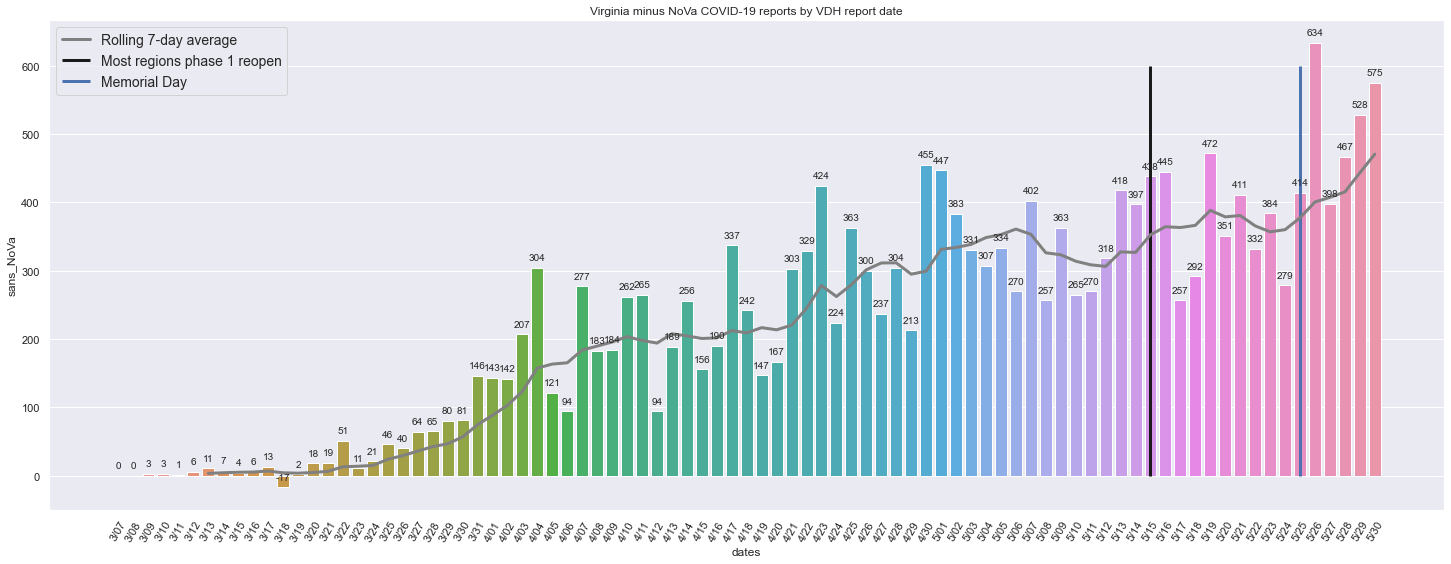

In [62]:
plt.figure(figsize=(25, 9))
VA_sans_NoVa_reports_daily = sns.barplot(x='dates', y='sans_NoVa', data=Virginia_COVID_19)
for p in VA_sans_NoVa_reports_daily.patches:
    VA_sans_NoVa_reports_daily.annotate(format(p.get_height(), '1.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), 
                              textcoords='offset points')
plt.xticks(rotation=60)
plt.plot(Virginia_COVID_19['sans_NoVa_rolling_7'], color='gray', label='Rolling 7-day average', linewidth=3)
plt.vlines(x=69, ymin=0, ymax=600, color='k', label='Most regions phase 1 reopen', linewidth=3)
plt.vlines(x=79, ymin=0, ymax=600, color='b', label='Memorial Day', linewidth=3)
plt.title('Virginia minus NoVa COVID-19 reports by VDH report date')
plt.legend(loc='best', fontsize=14)
plt.savefig('Virginia minus NoVa COVID-19 reports by VDH report date')
plt.show()

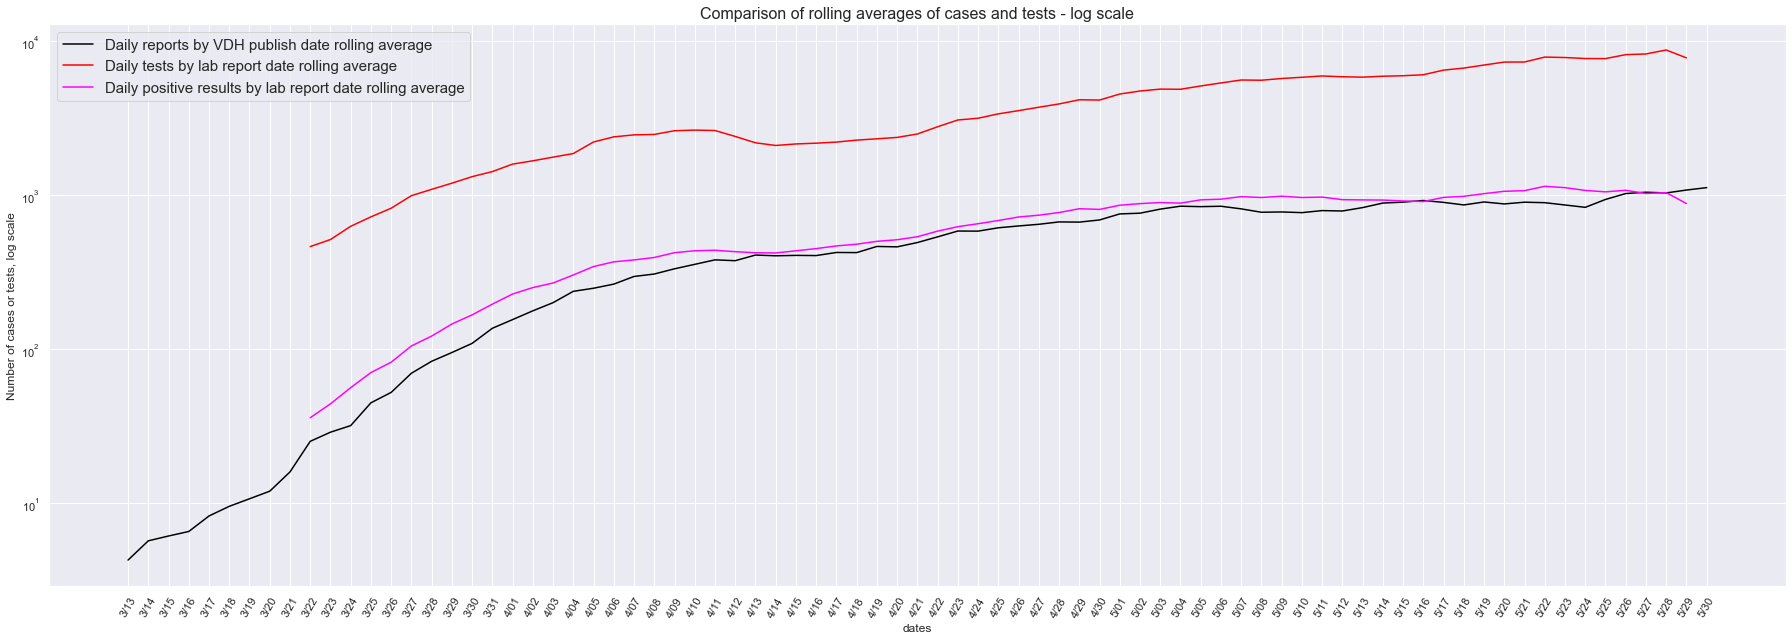

In [63]:
fig = plt.figure(figsize=(25,9))
sns.lineplot(x='dates', y='new_reports_rolling_7', data=Virginia_COVID_19, color='black', label='Daily reports by VDH publish date rolling average')
sns.lineplot(x='dates', y='new_tests_rolling_7', data=Virginia_COVID_19, color='red', label='Daily tests by lab report date rolling average')
sns.lineplot(x='dates', y='pos_lab_rolling_7', data=Virginia_COVID_19, color='magenta', label='Daily positive results by lab report date rolling average')
plt.yscale('log')
plt.ylabel('Number of cases or tests, log scale', fontsize=12)
plt.xticks(rotation=60)
plt.title('Comparison of rolling averages of cases and tests - log scale', fontsize=16)
plt.legend(loc='best', fontsize=15)
plt.tight_layout()
plt.savefig('Log scale comparison of new test reports and new tests')
plt.show()

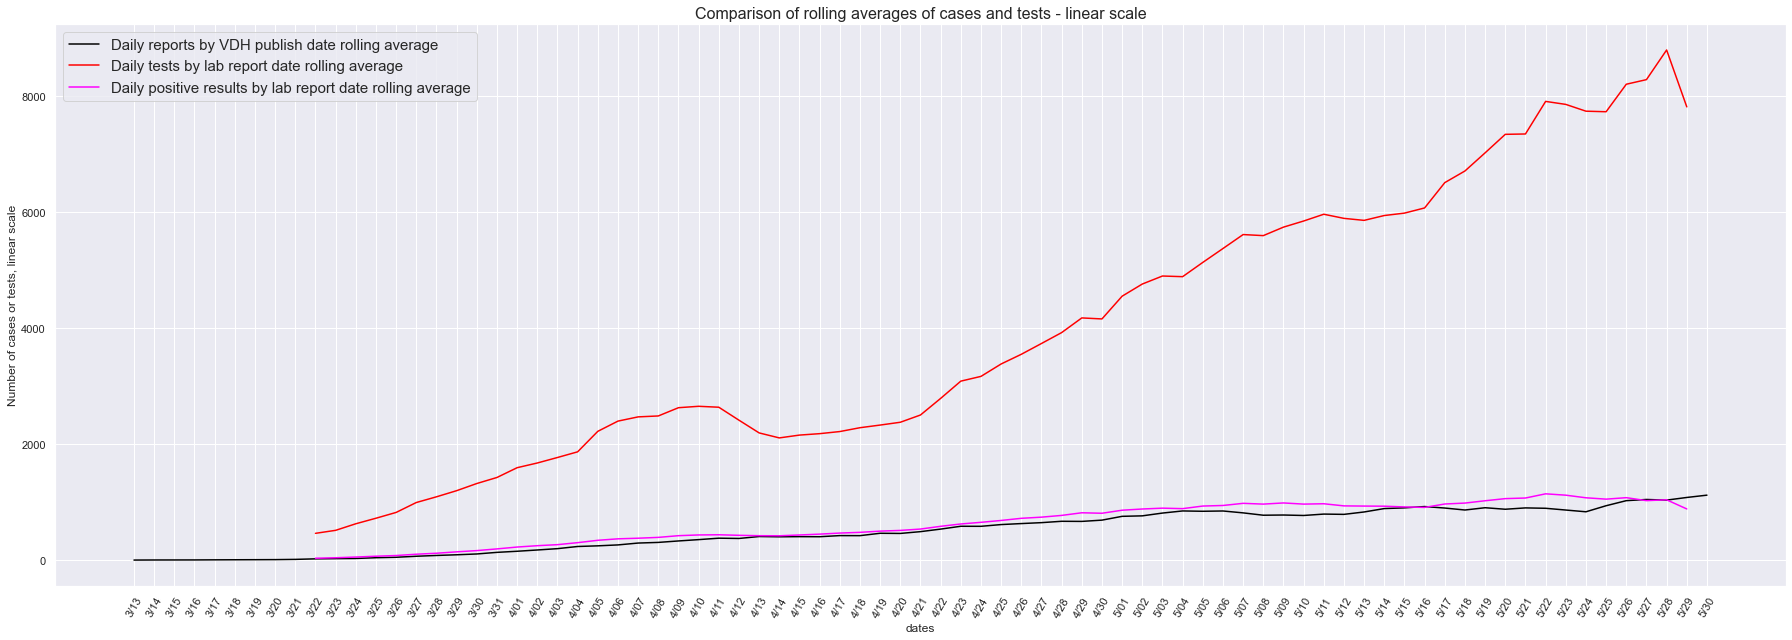

In [64]:
fig = plt.figure(figsize=(25,9))
sns.lineplot(x='dates', y='new_reports_rolling_7', data=Virginia_COVID_19, color='black', label='Daily reports by VDH publish date rolling average')
sns.lineplot(x='dates', y='new_tests_rolling_7', data=Virginia_COVID_19, color='red', label='Daily tests by lab report date rolling average')
sns.lineplot(x='dates', y='pos_lab_rolling_7', data=Virginia_COVID_19, color='magenta', label='Daily positive results by lab report date rolling average')
plt.ylabel('Number of cases or tests, linear scale', fontsize=12)
plt.xticks(rotation=60)
plt.title('Comparison of rolling averages of cases and tests - linear scale', fontsize=16)
plt.legend(loc='best', fontsize=15)
plt.tight_layout()
#plt.savefig('comparison of new test reports and new tests')
plt.show()

In [65]:
df_rolling_7 = Virginia_COVID_19[['new_reports_rolling_7', 'hosp_rolling_7', 'new_tests_rolling_7', 'deaths_rolling_7', 'pos_lab_rolling_7']]

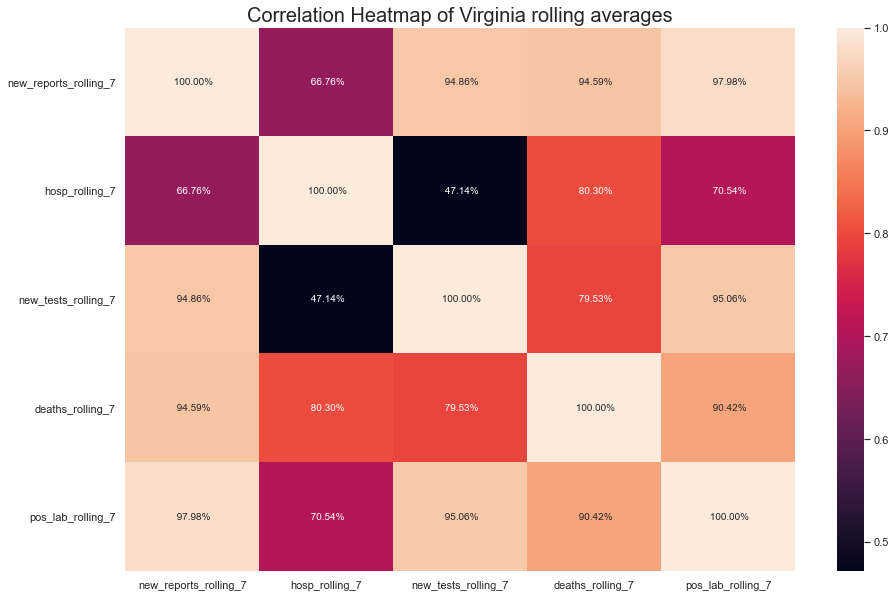

In [66]:
df_rolling_7_corr = df_rolling_7.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_rolling_7_corr, annot=True, fmt=' .2%', ax=ax)
plt.title('Correlation Heatmap of Virginia rolling averages', fontsize=20)
f.savefig('Correlation Heatmap of Virginia rolling averages')

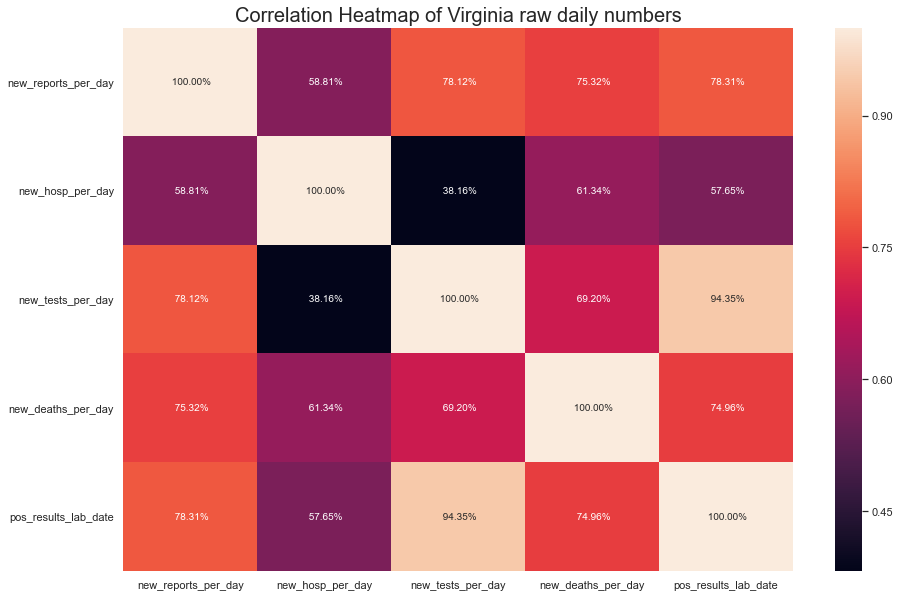

In [67]:
raw_corr = Virginia_COVID_19[['new_reports_per_day', 'new_hosp_per_day', 'new_tests_per_day', 'new_deaths_per_day', 'pos_results_lab_date']]

raw_corr = raw_corr.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(raw_corr, annot=True, fmt=' .2%', ax=ax)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Virginia raw daily numbers', fontsize=20)
plt.show()
f.savefig('Correlation Heatmap of Virginia raw daily numbers')

"There's only more cases because there's more tests!!" The cases that exist will exist whether we are testing or not. What we should want to see is the correlation between testing and positive cases declining by having the same or fewer raw number of positive tests/reports even with a higher raw number of tests. On the log scale above, we should want to see the red line of tests trending upward, while the positive results and reports trend downward. We should not want to see them trending in parallel or toward each other.  (Log scales show relative values rather than absolute values; that the tests and positive lab reports in log scale trend in generally the same direction is another way of showing the high correlation that is on the heat maps. The rates and direction of change are highly correlated. The correlation graphs below highlight the points in time where the correlation dropped, which is less easy to see on the log graph.)

When Gov Northam talks about "percent positivity" he is referring to the percentage of tests that come back positive out of the number of tests administered that day. This can be misleading because the number of positive results can still increase, while the number of tests increases by a greater proportional amount. That is, the denominator is increasing by more than the numerator is increasing. The correlation would also drop in that case, however, on the log scale, you would see all the lines trending upward, with the testing line trending upward at a higher rate. 

When the coorelation is less than zero, the lines are trending toward each other.

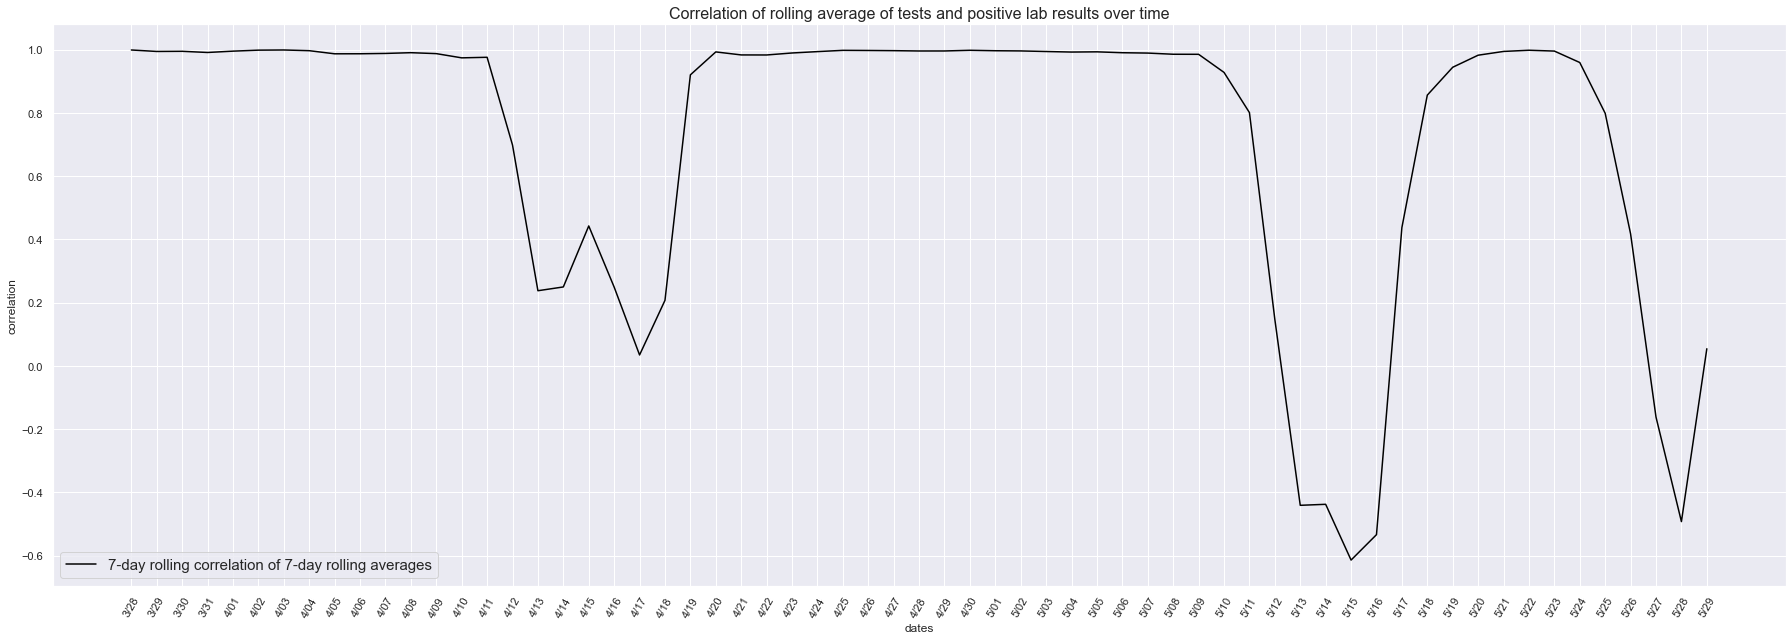

In [68]:
tests_pos_corr = df_rolling_7['new_tests_rolling_7'].rolling(7).corr(df_rolling_7['pos_lab_rolling_7'])
fig = plt.figure(figsize=(25,9))
sns.lineplot(x=Virginia_COVID_19['dates'], y=tests_pos_corr, color='black', label='7-day rolling correlation of 7-day rolling averages')
plt.ylabel('correlation', fontsize=12)
plt.xticks(rotation=60)
plt.title('Correlation of rolling average of tests and positive lab results over time', fontsize=16)
plt.legend(loc='best', fontsize=15)
plt.tight_layout()
plt.savefig('Rolling average correlation of tests and positive lab results change over time')
plt.show()

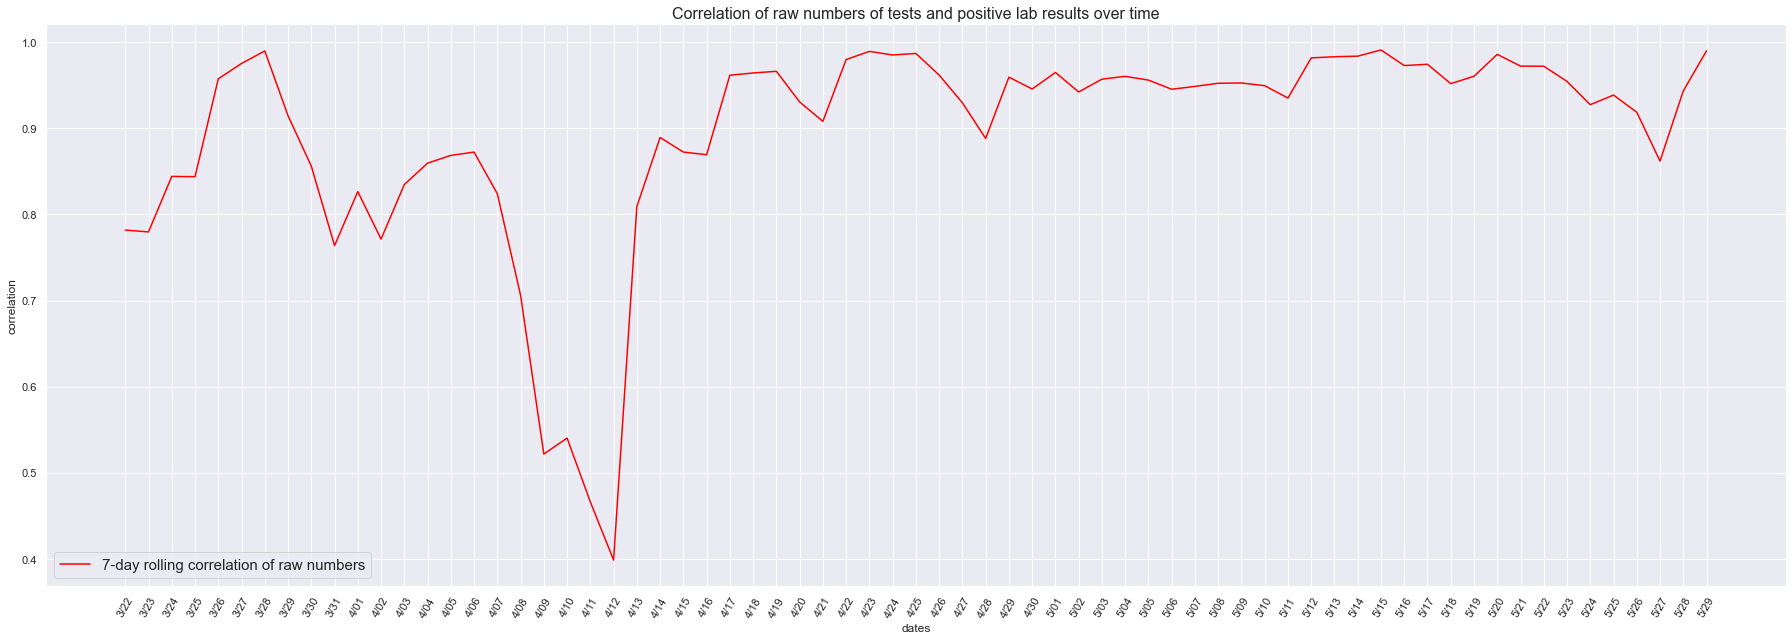

In [69]:
tests_pos_raw_corr = Virginia_COVID_19['new_tests_per_day'].rolling(7).corr(Virginia_COVID_19['pos_results_lab_date'])
fig = plt.figure(figsize=(25,9))
sns.lineplot(x=Virginia_COVID_19['dates'], y=tests_pos_raw_corr, color='red', label='7-day rolling correlation of raw numbers')
plt.ylabel('correlation', fontsize=12)
plt.xticks(rotation=60)
plt.title('Correlation of raw numbers of tests and positive lab results over time', fontsize=16)
plt.legend(loc='best', fontsize=15)
plt.tight_layout()
plt.savefig('Correlation of raw numbers of tests and positive lab results over time')
plt.show()

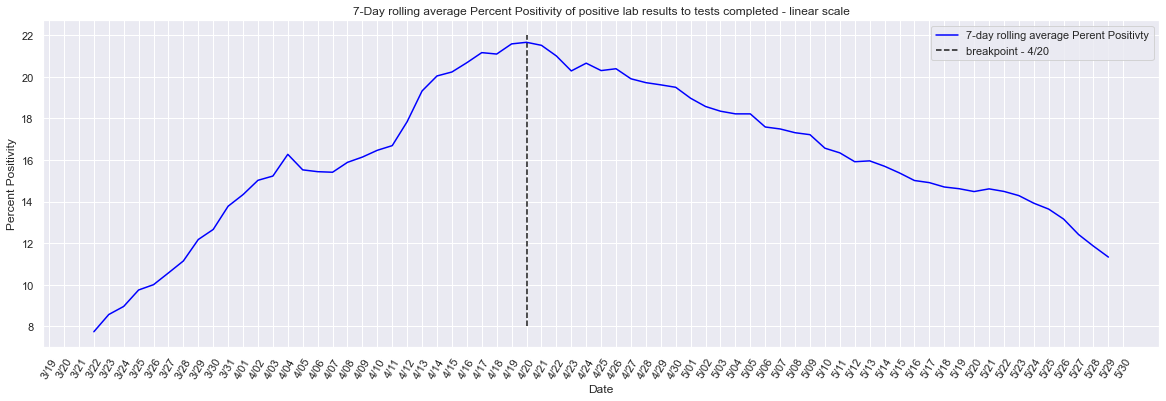

In [70]:
X = Virginia_COVID_19['pos_lab_rolling_7']
y = Virginia_COVID_19['new_tests_rolling_7']
plt.figure(figsize=(20, 6))
plt.plot(Virginia_COVID_19['dates'], ((X / y) * 100), color='blue', label='7-day rolling average Perent Positivty')
plt.vlines(x=44, ymin=8, ymax=22, color='k', linestyle='--', label='breakpoint - 4/20')
plt.ylabel('Percent Positivity')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.title('7-Day rolling average Percent Positivity of positive lab results to tests completed - linear scale')
plt.legend(loc='best')
plt.show()

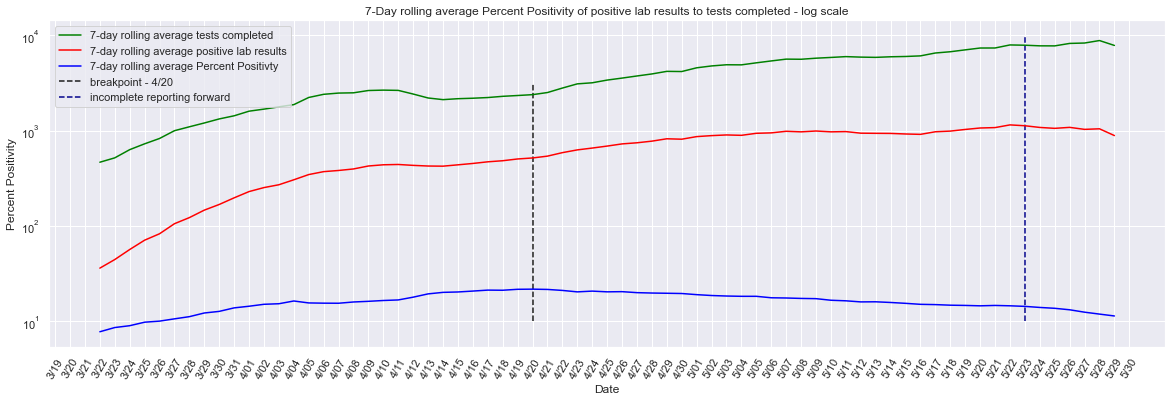

In [72]:
X = Virginia_COVID_19['pos_lab_rolling_7']
y = Virginia_COVID_19['new_tests_rolling_7']
plt.figure(figsize=(20, 6))
plt.plot(y, color='green', label='7-day rolling average tests completed')
plt.plot(X, color='red', label='7-day rolling average positive lab results')
plt.plot(Virginia_COVID_19['dates'], ((X / y) * 100), color='blue', label='7-day rolling average Percent Positivty')
plt.yscale('log')
plt.vlines(x=44, ymin=10**1, ymax=10**3.5, color='k', linestyle='--', label='breakpoint - 4/20')
plt.vlines(x=77, ymin=10**1, ymax=10**4, color='darkblue', linestyle='--', label='incomplete reporting forward')
plt.ylabel('Percent Positivity')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.title('7-Day rolling average Percent Positivity of positive lab results to tests completed - log scale')
plt.legend(loc='upper left')
plt.show()

In [73]:
from scipy.stats import linregress
print('Slope Positive tests 3/22-5/23: ', linregress([15, Virginia_COVID_19['pos_lab_rolling_7'][15]], [77, Virginia_COVID_19['pos_lab_rolling_7'][77]])[0])
print('Slope Positive tests 3/22-4/19: ', linregress([15, Virginia_COVID_19['pos_lab_rolling_7'][15]], [44, Virginia_COVID_19['pos_lab_rolling_7'][44]])[0])
print('Slope Positive tests 4/20-5/23: ', linregress([44, Virginia_COVID_19['pos_lab_rolling_7'][44]], [77, Virginia_COVID_19['pos_lab_rolling_7'][77]])[0])
print('\n')
print('Slope Tests 3/22-5/23: ', linregress([15, Virginia_COVID_19['new_tests_rolling_7'][15]], [77, Virginia_COVID_19['new_tests_rolling_7'][77]])[0])
print('Slope Tests 3/22-4/19: ', linregress([15, Virginia_COVID_19['new_tests_rolling_7'][15]], [45, Virginia_COVID_19['new_tests_rolling_7'][45]])[0])
print('Slope Tests 4/20-5/23: ', linregress([44, Virginia_COVID_19['new_tests_rolling_7'][44]], [77, Virginia_COVID_19['new_tests_rolling_7'][77]])[0])

Slope Positive tests 3/22-5/23:  49.795918367346935
Slope Positive tests 3/22-4/19:  22.448979591836736
Slope Positive tests 4/20-5/23:  2.2181818181818183


Slope Tests 3/22-5/23:  17.28625833068867
Slope Tests 3/22-4/19:  5.463979688987623
Slope Tests 4/20-5/23:  3.3316410789650748


- From 3/22 to 4/19, the rolling average of testing (denominator) increased with a slope of 5.46 while positive tests (numerator) increased with a slope of 22.44. The numerator increased more than the denominator increased, leading to an increase in 'percent positivity.
- From 4/20 to 5/23, the rolling average of testing (denominator) increased with a slope of 3.33 while positive tests (numerator) increased with a slope of 2.22. The denominator increased more than the numerator increased, leading to a decline in 'percent positivity.'
- 'Percent positivity' is only a good metric for progress if raw numbers of cases are trending down (with a negative slope); that is, the positive tests (numerator) decrease while the testing (denominator) increases 
- Tests and positive results for dates forward of 5/23 are subject to heavy revision as tests and results may take several days to be reported to the VDH